<a href="https://colab.research.google.com/github/atishpanday/Twitter-Data-Analysis/blob/main/Twitter_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [ ]:
data=pd.read_csv('/content/drive/My Drive/only_hindi_tokenized.csv')

data_r=data.rename(columns={"index_in _whole data": "index_in_whole_data"})

list_form=[]
for i in data_r.only_hindi_tokenized:
  i=i.strip("]'[").split("', '")
  
  list_form.append(i)

data_r["list_form"]=list_form

datawhole=pd.read_csv('/content/drive/My Drive/hindi_total.csv')
date=[]
for i in data_r.index_in_whole_data:
  date.append(datawhole.date[i])

data_r["date"]=date

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,5,14,18) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
data2= data_r

data2['date'] = pd.to_datetime(data2['date'])
df =data2

In [ ]:
mask = (data2['date'] >= '2020-03-22') & (data2['date'] <= '2020-03-31' )
data_3=data2.loc[mask]
df=data_3

In [ ]:
s = df['mentions'].tolist()
for i in range(len(df['mentions'])):
    s[i] = s[i].strip("]'[").split("', '")

edgelist = []
nodelist = df['username'].tolist()
for i in range(len(df['mentions'])):
    if ((len(s[i])) > 0):
        for j in range(len(s[i])):
            if ((len(s[i][j])) > 1):
                edgelist.append((df['username'].iloc[i], s[i][j]))

G1 = nx.DiGraph()
G1.add_edges_from(edgelist)

In [ ]:
h=[]

rumour_words=['गोबर','गाय','कंडे','शुद्ध','शाकाहारी','प्याज','प्याज़','गोबर','शंख','गिलोय','थाली','ध्वनि','आवाज़',
              'आवाज','दीपक','मोमबत्ती','दिया','लहसुन','मांस','जानवर','पक्षी','पशु','मांसाहारी','आध्यात्मिक','अध्यात्म','परमेश्वर','भक्ति']
        
for i in list(df.index):
  x=df.list_form[i]
  for j in x:
    for l in rumour_words:
      if j==l:
        h.append(df.index_in_whole_data[i])     

index_rumours=list(set(h))    
print(len(index_rumours))
rumour_frame=df[df["index_in_whole_data"].isin(index_rumours)]
print(len(rumour_frame))

44924
44924


In [ ]:
total_index=df.index_in_whole_data.tolist()
f=set(total_index).symmetric_difference(set(index_rumours))
non_rumour_index=list(f)

non_rumour_frame=df[df["index_in_whole_data"].isin(non_rumour_index)]

In [ ]:
rumour_nodes=list(set(rumour_frame.username.tolist()))
q=list(set(non_rumour_frame.username.tolist()))
intersection=list(set(rumour_nodes) & set(q))
non_rumour_nodes=list(set(q).symmetric_difference(set(intersection)))                     

s = df['mentions'].tolist()
for i in range(len(df['mentions'])):
    s[i] = s[i].strip("]'[").split("', '")
    
q1=[]                                                                    

for i in range(len(df['mentions'])):
    if ((len(s[i])) > 0):
        for j in range(len(s[i])):
            if ((len(s[i][j])) > 1):
                q1.append(s[i][j])

q2=list(set(q1))
intersection1=list(set(rumour_nodes) & set(q2))
intersection2=list(set(non_rumour_nodes) & set(q2))

non_rumour_nodes1=list(set(q2).symmetric_difference(set(intersection1)))                    # mentions
non_rumour_nodes2=list(set(non_rumour_nodes1).symmetric_difference(set(intersection2))) 

In [ ]:
rumour_nodes = list(set(list(set(rumour_nodes)&set(list(G1.nodes())))))

In [ ]:
non_rumour_nodes = list(set(non_rumour_nodes)&set(list(G1.nodes())))
for nodes in non_rumour_nodes2:
  non_rumour_nodes.append(nodes)

In [ ]:
len(non_rumour_nodes)

151561

In [ ]:
len(rumour_nodes)

17089

In [ ]:
"counting tweets per user"



tweet_count=df.groupby('username').count().rename(columns={"date": "no_of_tweets_per_user"})
tweet_count.reset_index(inplace=True)
tweet_count=tweet_count[["username","no_of_tweets_per_user"]]



"in and out degree"


in_degree=list(G1.in_degree())
out_degree=list(G1.out_degree())  # converts g.out_degree(), a class type, into a list type
in_degree.sort(key=lambda x: x[1], reverse=True)  # arrange degree list(each element is tuple like (node, degree of node) in descending order of degrees
out_degree.sort(key=lambda x: x[1], reverse=True)

in_degree_dataframe = pd.DataFrame(in_degree, columns=['username', 'in_Degree'])

out_degree_dataframe = pd.DataFrame(out_degree, columns=['username', 'out_Degree'])


out_degree_dataframe['in_degree'] = out_degree_dataframe['username'].map(dict(G1.in_degree()))
in_degree_dataframe['out_degree'] = in_degree_dataframe['username'].map(dict(G1.out_degree()))

out_degree_dataframe=out_degree_dataframe.merge(tweet_count, on='username', how='outer')
in_degree_dataframe=in_degree_dataframe.merge(tweet_count, on='username', how='outer')

out_degree_dataframe=out_degree_dataframe.fillna(0)
in_degree_dataframe=in_degree_dataframe.fillna(0)

print(out_degree_dataframe.head(10))
print(in_degree_dataframe.head(10))

          username  out_Degree  in_degree  no_of_tweets_per_user
0   anjanaagrawal6       426.0       55.0                  220.0
1      mineekumari       394.0       38.0                  181.0
2  yudhishthirsah6       388.0       65.0                  217.0
3     ashram234567       383.0       43.0                  183.0
4  eklavlyastories       375.0        0.0                  276.0
5  sangeetabhabhra       366.0       24.0                  160.0
6   pramod00184984       342.0       44.0                  164.0
7        swwagatam       311.0       28.0                  114.0
8  ragarwa86237458       307.0        2.0                  238.0
9     manish373733       297.0       59.0                  124.0
          username  in_Degree  out_degree  no_of_tweets_per_user
0     narendramodi    47091.0         5.0                   13.0
1         pmoindia    23261.0         1.0                   17.0
2  myogiadityanath    13952.0         6.0                   29.0
3         amitshah     85

In [ ]:
user_vs_tweets = {}
i = 0
for keys in tweet_count['username']:
  user_vs_tweets[keys] = tweet_count['no_of_tweets_per_user'][i]
  i += 1

In [ ]:
all_out_degrees = []
all_no_of_tweets = []
for nodes in G1.nodes():
  all_out_degrees.append(len(G1.out_edges(nodes)))
  if nodes in user_vs_tweets:
    all_no_of_tweets.append(user_vs_tweets[nodes])
  else:
    all_no_of_tweets.append(0)

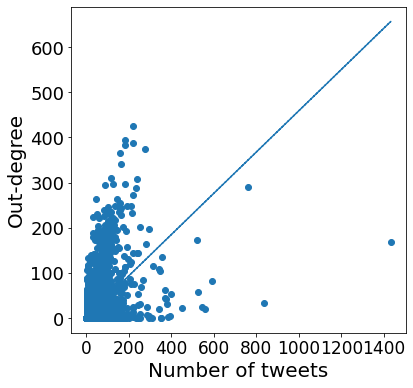

In [ ]:
plt.scatter(all_no_of_tweets,all_out_degrees)
plt.xlabel('Number of tweets',fontsize = 20)
plt.ylabel('Out-degree',fontsize = 20)
plt.xticks(fontsize = 17)
plt.yticks(fontsize = 18)
trend1 = np.polyfit(all_no_of_tweets,all_out_degrees,1)
polytrend = np.poly1d(trend1)
plt.plot(all_no_of_tweets,polytrend(all_no_of_tweets),'--',label = '1st order polynomial')
plt.gcf().set_size_inches(6,6)
plt.show()

In [ ]:
all_dict = {}
i = 0
for nodes in G1.nodes():
  all_dict[all_out_degrees[i]] = [nodes,all_no_of_tweets[i]]
  i += 1

In [ ]:
sorted(all_dict.items(),reverse=True)[:20]

[(59, ['amaresh03335514', 3]),
 (50, ['chaowkidar71', 1]),
 (48, ['ajitsinhjagirda', 1]),
 (46, ['akpurohitngr', 1]),
 (28, ['pradeep1101976', 18]),
 (27, ['vinodsandjain', 11]),
 (20, ['hemang25601597', 4]),
 (19, ['news24tvchannel', 23]),
 (18, ['bhindoraparas', 1]),
 (17, ['zeerajasthan_', 87]),
 (16, ['rajeev17135900', 10]),
 (15, ['vijayjollybjp', 1]),
 (14, ['newsind1', 2]),
 (13, ['murlipaliwalptc', 1]),
 (12, ['vsj1974', 1]),
 (11, ['sushilkuhar8687', 1]),
 (10, ['tonysrivastav', 8]),
 (9, ['yrawal55', 1]),
 (8, ['world_air', 2]),
 (7, ['zee_hindustan', 11])]

In [ ]:
all_pc = np.corrcoef(all_out_degrees,all_no_of_tweets)[0,1]
all_det = all_pc**2
print(all_pc,all_det) #phase 5

0.5587933005767434 0.31224995276945067


In [ ]:
non_rumor_out_degrees = []
non_rumor_no_of_tweets = []
for nodes in non_rumour_nodes:
  if G1.has_node(nodes) == True:
    non_rumor_out_degrees.append(G1.out_degree(nodes))
    if nodes in user_vs_tweets:
      non_rumor_no_of_tweets.append(user_vs_tweets[nodes])
    else:
      non_rumor_no_of_tweets.append(0)

In [ ]:
non_rumor_dict = {}
i = 0
for nodes in non_rumour_nodes:
  if G1.has_node(nodes):
    non_rumor_dict[non_rumor_out_degrees[i]] = [nodes,non_rumor_no_of_tweets[i]]
    i += 1
sorted(non_rumor_dict.items(),reverse=True)[:10]

[(59, ['amaresh03335514', 3]),
 (50, ['chaowkidar71', 1]),
 (48, ['ajitsinhjagirda', 1]),
 (46, ['akpurohitngr', 1]),
 (28, ['pradeep1101976', 18]),
 (27, ['vinodsandjain', 11]),
 (20, ['hemang25601597', 4]),
 (19, ['news24tvchannel', 23]),
 (18, ['amitparjapati85', 4]),
 (17, ['laeqg3dtejcl9wc', 2]),
 (16, ['rajeev17135900', 10]),
 (15, ['vijayjollybjp', 1]),
 (14, ['newsind1', 2]),
 (13, ['murlipaliwalptc', 1]),
 (12, ['real_sisodia', 1]),
 (11, ['adv_vikas_agra', 2]),
 (10, ['tonysrivastav', 8]),
 (9, ['drjitendraverm', 1]),
 (8, ['arvindagl', 3]),
 (7, ['ydvsukhnarayan', 3])]

In [ ]:
nrpc = np.corrcoef(non_rumor_out_degrees,non_rumor_no_of_tweets)[0,1]
nr_det = nrpc**2
print(nrpc,nr_det) #phase 5

0.505691379270484 0.25572377106848454


In [ ]:
rumor_out_degrees = []
rumor_no_of_tweets = []
for nodes in rumour_nodes:
  if G1.has_node(nodes) == True:
    rumor_out_degrees.append(G1.out_degree(nodes))
    if nodes in user_vs_tweets:
      rumor_no_of_tweets.append(user_vs_tweets[nodes])
    else:
      rumor_no_of_tweets.append(0)

In [ ]:
rumor_dict = {}
i = 0
for nodes in rumour_nodes:
  if G1.has_node(nodes):
    rumor_dict[rumor_out_degrees[i]] = [nodes,rumor_no_of_tweets[i]]
    i += 1
sorted(rumor_dict.items(),reverse=True)[:20]

[(80, ['hsnewslive', 106]),
 (61, ['zeerajasthan_', 230]),
 (57, ['engrkumbhakar', 22]),
 (52, ['rupeshsaigal', 8]),
 (50, ['racymotwani', 15]),
 (48, ['hindunation1st', 1]),
 (45, ['chamanv27362472', 5]),
 (44, ['uj8585', 30]),
 (43, ['anooppaswan6', 17]),
 (42, ['shyam_shrimali', 8]),
 (40, ['varinde18671824', 5]),
 (39, ['u4t8prekvm8er20', 15]),
 (38, ['abhishek929292', 11]),
 (37, ['rameshm68867180', 8]),
 (36, ['arunasi25245277', 9]),
 (35, ['arjunjadhav_', 9]),
 (34, ['vikaschitrans', 9]),
 (33, ['snehlat37332901', 11]),
 (32, ['sonuver13224862', 3]),
 (31, ['ramkishandass56', 11])]

In [ ]:
rpc = np.corrcoef(rumor_out_degrees,rumor_no_of_tweets)[0,1]
r_det = rpc**2
print(rpc,r_det) #phase 5

0.5299102423785358 0.28080486497767854


In [ ]:
count = 0
for r in rumour_nodes:
  count = count + len(G1.out_edges(r))

f = G1.subgraph(rumour_nodes).copy()
rumor_to_rumor_edges = f.number_of_edges()

rumor_to_non_rumor_edges = count - rumor_to_rumor_edges

count2 = 0
for r in rumour_nodes:
  count2 += len(G1.in_edges(r))

non_rumor_to_rumor_edges = count2 - rumor_to_rumor_edges

non_rumor_to_non_rumor_edges = G1.number_of_edges() - rumor_to_rumor_edges - rumor_to_non_rumor_edges - non_rumor_to_rumor_edges

print('rumor_to_rumor ',rumor_to_rumor_edges)
print('rumor_to_non_rumor ',rumor_to_non_rumor_edges)
print('non_rumor_to_non_rumor',non_rumor_to_non_rumor_edges)
print('non_rumor_to_rumor',non_rumor_to_rumor_edges)

rumor_to_rumor  117077
rumor_to_non_rumor  210762
non_rumor_to_non_rumor 441859
non_rumor_to_rumor 156948


In [ ]:
rumor_to_rumor_edges/f.number_of_nodes(),non_rumor_to_rumor_edges/(G1.number_of_nodes()-f.number_of_nodes()),G1.number_of_edges()/G1.number_of_nodes()

(4.504520795660036, 0.8158398136981744, 4.243525807470909)

In [ ]:
rumor_to_rumor_edges/f.number_of_nodes(),non_rumor_to_rumor_edges/(G1.number_of_nodes()-f.number_of_nodes()),G1.number_of_edges()/G1.number_of_nodes()

(2.536962184496542, 0.49606580829756797, 3.3338845852554617)

In [ ]:
rumor_to_rumor_edges/f.number_of_nodes(),non_rumor_to_rumor_edges/(G1.number_of_nodes()-f.number_of_nodes()),G1.number_of_edges()/G1.number_of_nodes()

(1.2688391038696538, 0.2467288771680698, 2.5209038019212557)

In [ ]:
rumor_to_rumor_edges/f.number_of_nodes(),non_rumor_to_rumor_edges/(G1.number_of_nodes()-f.number_of_nodes()),G1.number_of_edges()/G1.number_of_nodes()

(0.40937848902121327, 0.09142419601837672, 1.9201418503389145)

In [ ]:
rumor_to_rumor_edges/f.number_of_nodes(),non_rumor_to_rumor_edges/(G1.number_of_nodes()-f.number_of_nodes()),G1.number_of_edges()/G1.number_of_nodes()

(0.0, 0.006727344677483181, 1.2445213379469435)

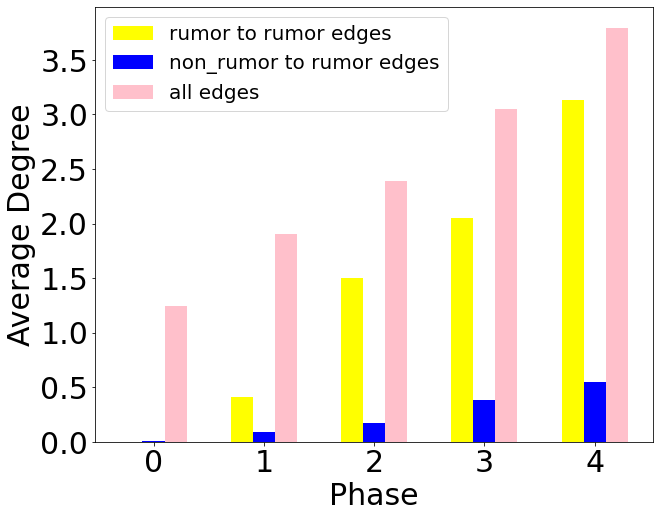

In [ ]:
#not cumulative average degrees

yellow_bar = (0.0,0.4072085889570552,1.5017137960582692,2.0474511532246216,3.1351746737667505)
blue_bar = (0.006727344677483181,0.08670645686380901,0.1704808342527672,0.3843144086079138,0.5515469019074828)
pink_bar = (1.2445213379469435,1.901606616598536,2.393283165193388,3.047116754261015,3.7961577230951673)
width = 0.2
ind = np.arange(5)
plt.bar(ind,yellow_bar,width,label = "rumor to rumor edges",color = "yellow")
plt.bar(ind + width,blue_bar,width,label = "non_rumor to rumor edges",color = "blue")
plt.bar(ind + 2*width,pink_bar,width,label = "all edges",color = "pink")
plt.xticks(ind+width,(0,1,2,3,4),fontsize = 30)
plt.yticks(fontsize = 30)
plt.xlabel('Phase',fontsize = 30)
plt.ylabel('Average Degree',fontsize = 30)
plt.gcf().set_size_inches(10,8)
plt.legend(prop = {'size' : 20})
plt.show()

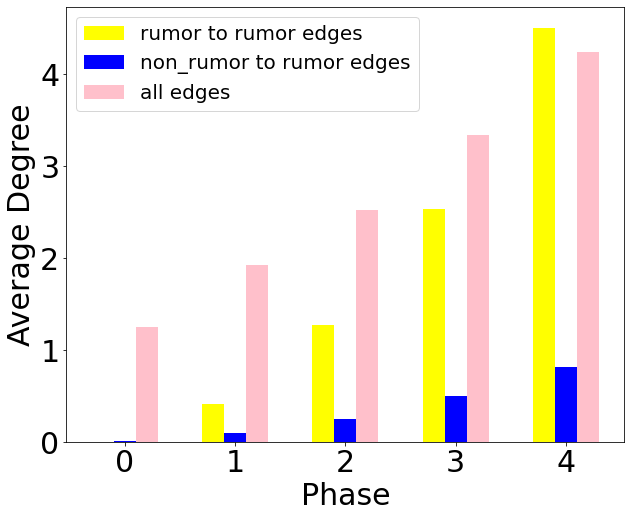

In [ ]:
#cumulative average degrees

yellow_bar = (0.0,0.40937848902121327,1.2688391038696538,2.536962184496542,4.504520795660036)
blue_bar = (0.006727344677483181,0.09142419601837672,0.2467288771680698,0.49606580829756797,0.8158398136981744)
pink_bar = (1.2445213379469435,1.9201418503389145,2.5209038019212557,3.3338845852554617,4.243525807470909)
width = 0.2
ind = np.arange(5)
plt.bar(ind,yellow_bar,width,label = "rumor to rumor edges",color = "yellow")
plt.bar(ind + width,blue_bar,width,label = "non_rumor to rumor edges",color = "blue")
plt.bar(ind + 2*width,pink_bar,width,label = "all edges",color = "pink")
plt.xticks(ind+width,(0,1,2,3,4),fontsize = 30)
plt.yticks(fontsize = 30)
plt.xlabel('Phase',fontsize = 30)
plt.ylabel('Average Degree',fontsize = 30)
plt.gcf().set_size_inches(10,8)
plt.legend(prop = {'size' : 20})
plt.show()

In [ ]:
UG1 = G1.to_undirected()

In [ ]:
lcc = list(max(nx.connected_components(UG1)))

In [ ]:
len(set(rumour_nodes)&set(lcc)),len(lcc),len(set(rumour_nodes)&set(lcc))/len(lcc)

(58, 1927, 0.03009859885832901)

In [ ]:
len(set(rumour_nodes)&set(lcc)),len(lcc),len(set(rumour_nodes)&set(lcc))/len(lcc)

(2466, 19098, 0.1291234684260132)

In [ ]:
len(set(rumour_nodes)&set(lcc)),len(lcc),len(set(rumour_nodes)&set(lcc))/len(lcc)

(2265, 28194, 0.08033624175356459)

In [ ]:
len(set(rumour_nodes)&set(lcc)),len(lcc),len(set(rumour_nodes)&set(lcc))/len(lcc)

(6707, 78569, 0.08536445671957134)

In [ ]:
len(set(rumour_nodes)&set(lcc)),len(lcc),len(set(rumour_nodes)&set(lcc))/len(lcc)

(16922, 164620, 0.10279431417810715)

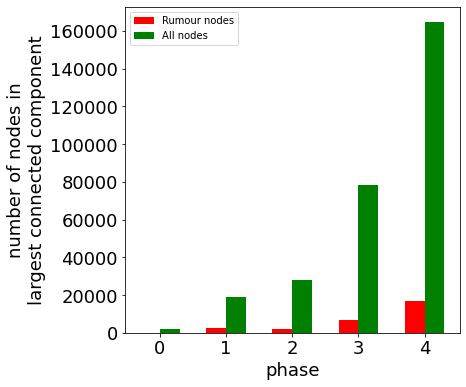

In [ ]:
red_bar = (58,2466,2265,6707,16922)
green_bar = (1927,19098,28194,78569,164620)
width = 0.3
ind = (np.arange(5))
plt.bar(ind,red_bar,width,color = 'red',label = 'Rumour nodes')
plt.bar(ind+width,green_bar,width,color = 'green',label = 'All nodes')
plt.xticks(ind+width/2,[0,1,2,3,4],fontsize = 18)
plt.yticks(fontsize = 18)
plt.xlabel('phase',fontsize = 18)
plt.ylabel('number of nodes in\nlargest connected component',fontsize = 18)
plt.gcf().set_size_inches(6,6)
plt.legend()

In [ ]:
top_rumour_nodes = {}
for nodes in rumour_nodes:
  top_rumour_nodes[nodes] = G1.degree(nodes)

In [ ]:
top_rumour_nodes = sorted(top_rumour_nodes.items(),key = lambda x:x[1],reverse=True)

In [ ]:
len(top_rumour_nodes),len(rumour_nodes)

(2608, 2608)

In [ ]:
shortest_paths = []
no_of_paths = []
for n in non_rumour_nodes:
  length = 0
  i = 0
  for r in top_rumour_nodes[:100]:
    if n in UG1 and r[0] in UG1:
      if nx.has_path(UG1,n,r[0]) == True:
        length += nx.shortest_path_length(UG1,n,r[0])
        i += 1
  if i > 0:
    shortest_paths.append(length)
    no_of_paths.append(i)

In [ ]:
i = 0
for n in top_rumour_nodes:
  if n[0] in UG1:
    i += 1
i

17089

In [ ]:
top_rumour_nodes[0][1]

8477

In [ ]:
'chandni2428' in UG1, 'kishand_panchal' in UG1

(False, True)

In [ ]:
print(shortest_paths[500:])
print(no_of_paths[500:])

[1920, 1725, 1950, 1560, 1414, 1863, 2538, 2544, 1957, 1590, 1718, 2153, 2019, 2277, 1858, 2406, 2322, 2628, 2239, 2217, 1335, 2088, 2118, 1696, 2398, 2365, 1790, 1638, 1663, 1900, 1455, 1594, 2291, 2510, 2567, 2497, 1894, 2654, 2473, 2154, 1992, 2019, 2015, 2166, 1910, 2159, 2846, 2504, 2463, 2337, 2400, 2201, 2157, 3074, 2498, 1549, 1992, 2025, 2806, 2454, 2127, 1714, 1619, 2244, 2271, 1683, 2192, 1799, 2218, 1631, 2003, 2540, 2317, 2190, 2162, 2027, 1594, 2299, 2060, 1903, 2447, 2066, 2364, 2152, 2359, 2691, 1513, 2268, 1, 2135, 2002, 2015, 2100, 2402, 2180, 1764, 1914, 2143, 1770, 2932, 2441, 2483, 1980, 1508, 1807, 1904, 2214, 1866, 1596, 1892, 2565, 1937, 1680, 1664, 1790, 2126, 1625, 1631, 2101, 2166, 1623, 1386, 1658, 1710, 2198, 2475, 1873, 2577, 1942, 2272, 2082, 1774, 2381, 2036, 1743, 1916, 2181, 2386, 2077, 1571, 2531, 1956, 2378, 2144, 2194, 2541, 1806, 2050, 1759, 1889, 2202, 2050, 2089, 1454, 2510, 2359, 1362, 1875, 1911, 2534, 1793, 2396, 2101, 2166, 1791, 2427, 2657, 

In [ ]:
avg_dist = []
for i in range(len(no_of_paths)):
  avg_dist.append(shortest_paths[i]/no_of_paths[i])

In [ ]:
path_dist = {}
for i in avg_dist:
  path_dist[i] = avg_dist.count(i)

Text(0, 0.5, 'number of nodes')

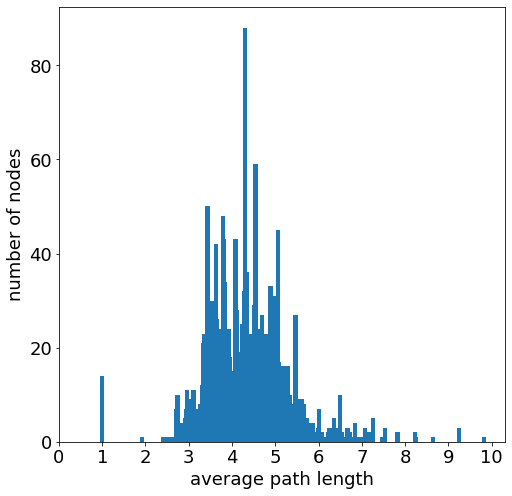

In [ ]:
plt.bar(list(path_dist.keys()),list(path_dist.values()),0.1)
plt.gcf().set_size_inches(8,8)
plt.xticks(np.arange(11),fontsize = 18)
plt.yticks(fontsize = 18)
plt.xlabel('average path length',fontsize = 18)
plt.ylabel('number of nodes',fontsize = 18)

In [ ]:
lcc = list(max(nx.connected_components(UG1)))
total_lengths = {}

i = 0
t = []
for r in top_rumour_nodes:
  t.append(r[0])
lcc_rumour_nodes = list(set(t)&set(lcc))
l = len(lcc_rumour_nodes)

for n in lcc:
  total_lengths[n] = 0

for r in lcc_rumour_nodes:
  i += 1
  temp = nx.single_source_shortest_path_length(UG1,r)
  for nodes in lcc:
    total_lengths[nodes] += temp[nodes]
  print(i)

Streaming output truncated to the last 5000 lines.
11924
11925
11926
11927
11928
11929
11930
11931
11932
11933
11934
11935
11936
11937
11938
11939
11940
11941
11942
11943
11944
11945
11946
11947
11948
11949
11950
11951
11952
11953
11954
11955
11956
11957
11958
11959
11960
11961
11962
11963
11964
11965
11966
11967
11968
11969
11970
11971
11972
11973
11974
11975
11976
11977
11978
11979
11980
11981
11982
11983
11984
11985
11986
11987
11988
11989
11990
11991
11992
11993
11994
11995
11996
11997
11998
11999
12000
12001
12002
12003
12004
12005
12006
12007
12008
12009
12010
12011
12012
12013
12014
12015
12016
12017
12018
12019
12020
12021
12022
12023
12024
12025
12026
12027
12028
12029
12030
12031
12032
12033
12034
12035
12036
12037
12038
12039
12040
12041
12042
12043
12044
12045
12046
12047
12048
12049
12050
12051
12052
12053
12054
12055
12056
12057
12058
12059
12060
12061
12062
12063
12064
12065
12066
12067
12068
12069
12070
12071
12072
12073
12074
12075
12076
12077
12078
12079
12080
12081
1

In [ ]:
len(lcc_non_rumour_nodes)

In [ ]:
len(total_lengths)

164620

In [ ]:
nrn = list(set(non_rumour_nodes)&set(lcc))

In [ ]:
non_rumour_nodes_path_lengths = []
for n in nrn:
  non_rumour_nodes_path_lengths.append(total_lengths[n]/l)

In [ ]:
len(set(non_rumour_nodes_path_lengths))

245

In [ ]:
path_dist = {}
for n in non_rumour_nodes_path_lengths:
  path_dist[n] = non_rumour_nodes_path_lengths.count(n)/len(nrn)
tmp_list = {}

for i in range(1,12):
  tmp_list[i] = 0
  for n in path_dist:
    if i<n<i+1:
      tmp_list[i] += n

Text(0.5, 0, 'Average Distance')

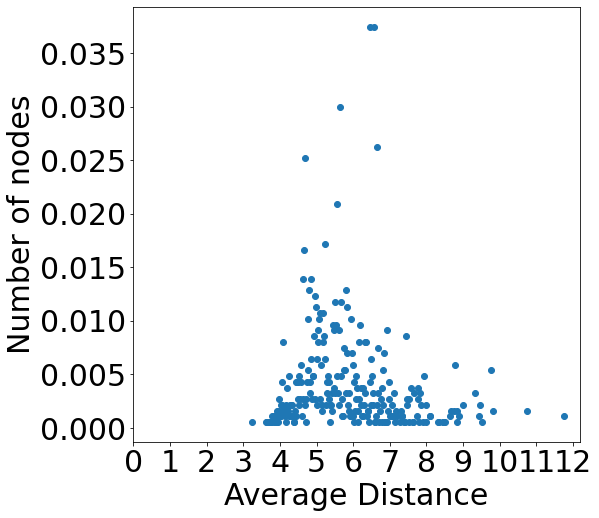

In [ ]:
plt.scatter(list(path_dist.keys()),list(path_dist.values()))
plt.gcf().set_size_inches(8,8)
plt.xticks(np.arange(13),fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel('Number of nodes',fontsize = 30)
plt.xlabel('Average Distance',fontsize = 30)

Text(0.5, 0, 'Average Distance')

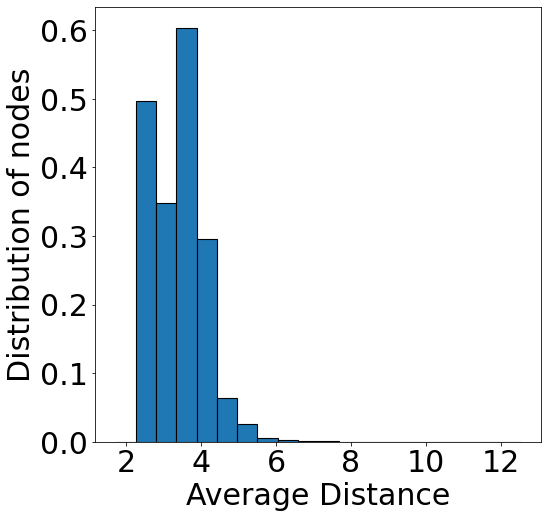

In [ ]:
plt.hist(non_rumour_nodes_path_lengths,bins = 20,density = True,edgecolor = 'black',linewidth = 1.1)
plt.gcf().set_size_inches(8,8)

plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel('Distribution of nodes',fontsize = 30)
plt.xlabel('Average Distance',fontsize = 30)
#x = list(path_dist.keys())
#y = list(path_dist.values())

#ymax = max(y)
#xpos = y.index(ymax)
#xmax = x[xpos]

#plt.annotate(xmax, xy=(xmax, ymax), xytext=(xmax, ymax+5),arrowprops=dict(facecolor='black', shrink=0.05),fontsize = 30)

In [ ]:
all_path_lengths = nx.all_pairs_shortest_path_length(UG1)

In [ ]:
for k in all_path_lengths:
  print(k)

Phase 1
rumor_to_rumor  0
rumor_to_non_rumor  174
non_rumor_to_non_rumor 3046
non_rumor_to_rumor 17

Phase 2
rumor_to_rumor  1100
rumor_to_non_rumor  11305
non_rumor_to_non_rumor 28579
non_rumor_to_rumor 1791

Phase 3
rumor_to_rumor  6230
rumor_to_non_rumor  27261
non_rumor_to_non_rumor 68571
non_rumor_to_rumor 9730

Phase 4
rumor_to_rumor  28244
rumor_to_non_rumor  73734
non_rumor_to_non_rumor 196978
non_rumor_to_rumor 45771

Phase 5
rumor_to_rumor  117077
rumor_to_non_rumor  210762
non_rumor_to_non_rumor 441859
non_rumor_to_rumor 156948

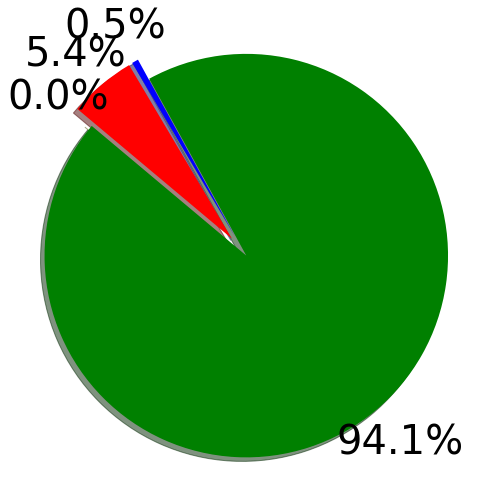

In [ ]:
edges = [#,#,#,#] #the number of edges (arrange accordingly)
explode = [0.01,0.01,0.01,0.1] #change arrangement acc to color
labels = ['Edges Between Rumor Nodes','Edges Between Non Rumor Nodes','Edges going from Non Rumor Nodes to Rumor Nodes','Edges going from Rumor Nodes to Non Rumor Nodes'] #this is the arrangement
colors = ['yellow','green','blue','red'] #change arrangement acc to color

plt.pie(edges, explode=explode, colors=colors,
autopct='%1.1f%%',textprops = {'fontsize':40},pctdistance = 0.7, shadow=True, startangle=140)

plt.axis('equal')
plt.gcf().set_size_inches(8,8)
plt.show()

In [ ]:
len(df1)

76358

In [ ]:
count = 0
for items in df1.list_form:
  if (len((set(items)&set(rumour_words)))>0):
    count+=1

In [ ]:
count

23332

In [ ]:
rumor_nodes_indices = list(set(index_rumours)&set(df1.index_in_whole_data))

In [ ]:
len(rumor_nodes_indices)

23332

In [ ]:
rumor_nodes = []
for i in rumor_nodes_indices:
  rumor_nodes.append(df1['username'][df1[df1['index_in_whole_data']==i].index.values])
rumor_nodes = list(set(rumor_nodes))

In [ ]:
len(set(rumor_nodes))

12422

In [ ]:
rg = G1.subgraph(list(set(rumor_nodes))).copy()

In [ ]:
rg.number_of_nodes(),rg.number_of_edges()

(16, 0)

In [ ]:
G1.number_of_nodes(),G1.number_of_edges()

(2601, 3237)

In [ ]:
count = 0
for n in G1.nodes:
  if n in rumor_nodes:
    if G1.in_degree(n) > 0:
      count += 1
count

7

In [ ]:
from matplotlib_venn import venn2 

In [ ]:
non_rumor_nodes = []
for n in G1.nodes:
  if n not in rg.nodes:
    non_rumor_nodes.append(n)

In [ ]:
nrg = G1.subgraph(non_rumor_nodes).copy()

In [ ]:
rumor_edges = []
non_rumor_edges = []

for edges in G1.edges:
  if edges[0] in rumor_nodes or edges[1] in rumor_nodes:
    rumor_edges.append(edges)

for edges in G1.edges:
  if edges[0] in non_rumor_nodes or edges[1] in non_rumor_nodes:
    non_rumor_edges.append(edges)

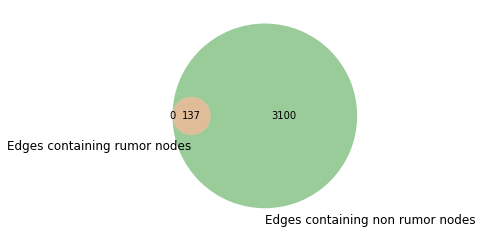

In [ ]:
venn2([set(rumor_edges),set(non_rumor_edges)],set_labels=('Edges containing rumor nodes','Edges containing non rumor nodes'))

In [ ]:
out_degrees = []
freq = {}
for n,k in G1.out_degree:
  out_degrees.append(k)
for i in out_degrees:
  freq[i] = out_degrees.count(i)

Text(0.5, 0, 'Degree')

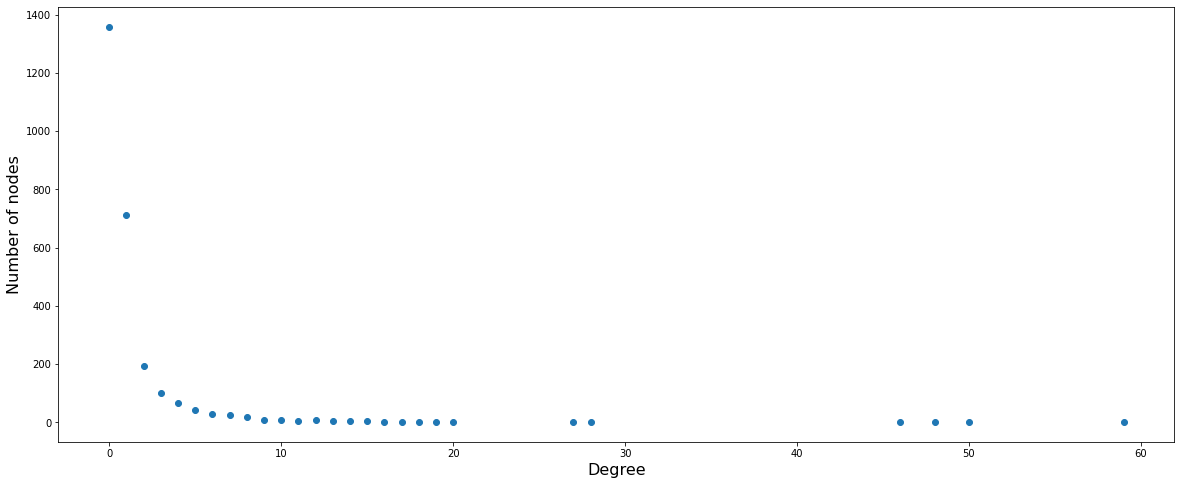

In [ ]:
plt.scatter(freq.keys(),freq.values())
plt.gcf().set_size_inches(20,8)
plt.ylabel('Number of nodes',fontsize = 16)
plt.xlabel('Degree',fontsize = 16)

In [ ]:
out_degrees_r = []
freq_r = {}
for n,k in rg.out_degree:
  out_degrees_r.append(k)
for i in out_degrees_r:
  freq_r[i] = out_degrees_r.count(i)

Text(0.5, 0, 'Degree')

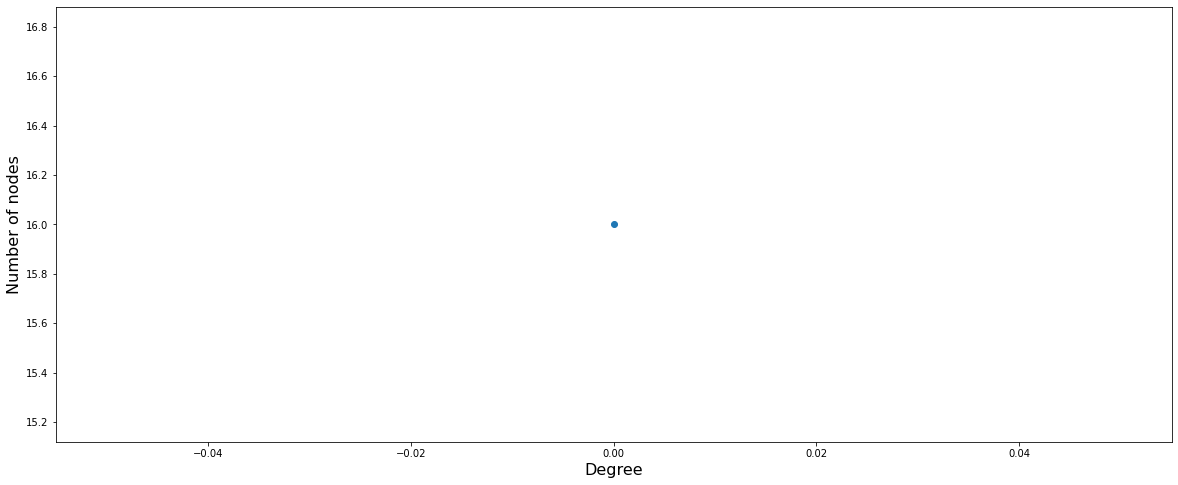

In [ ]:
plt.scatter(freq_r.keys(),freq_r.values())
plt.gcf().set_size_inches(20,8)
plt.ylabel('Number of nodes',fontsize = 16)
plt.xlabel('Degree',fontsize = 16)

In [ ]:
out_degrees_nr = []
freq_nr = {}
for n,k in nrg.out_degree:
  out_degrees_nr.append(k)
for i in out_degrees_nr:
  freq_nr[i] = out_degrees_nr.count(i)

Text(0.5, 0, 'Degree')

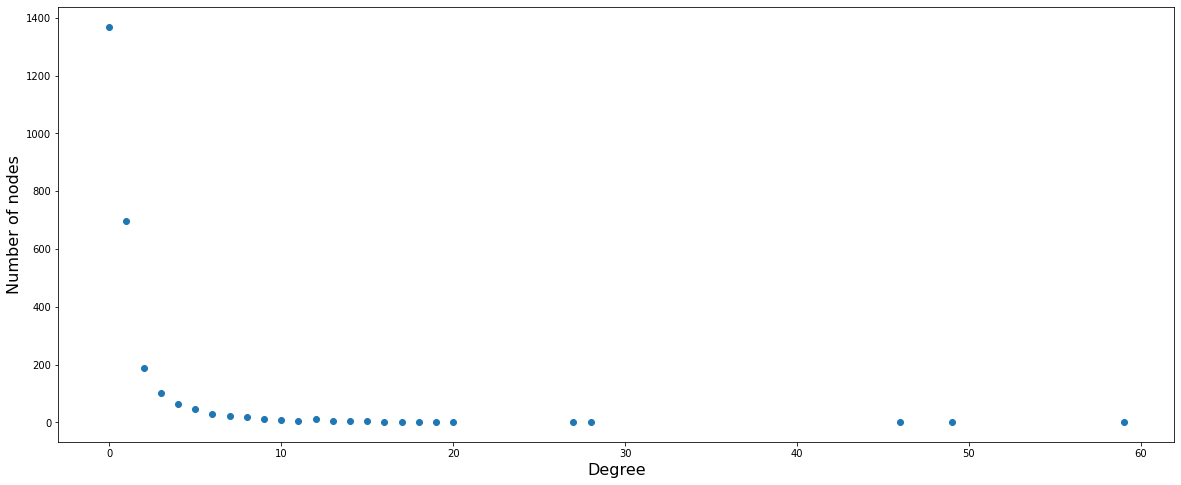

In [ ]:
plt.scatter(freq_nr.keys(),freq_nr.values())
plt.gcf().set_size_inches(20,8)
plt.ylabel('Number of nodes',fontsize = 16)
plt.xlabel('Degree',fontsize = 16)

In [ ]:
cc_r = {}
for n,k in rg.out_degree:
  cc_r[k] = nx.clustering(rg,n)

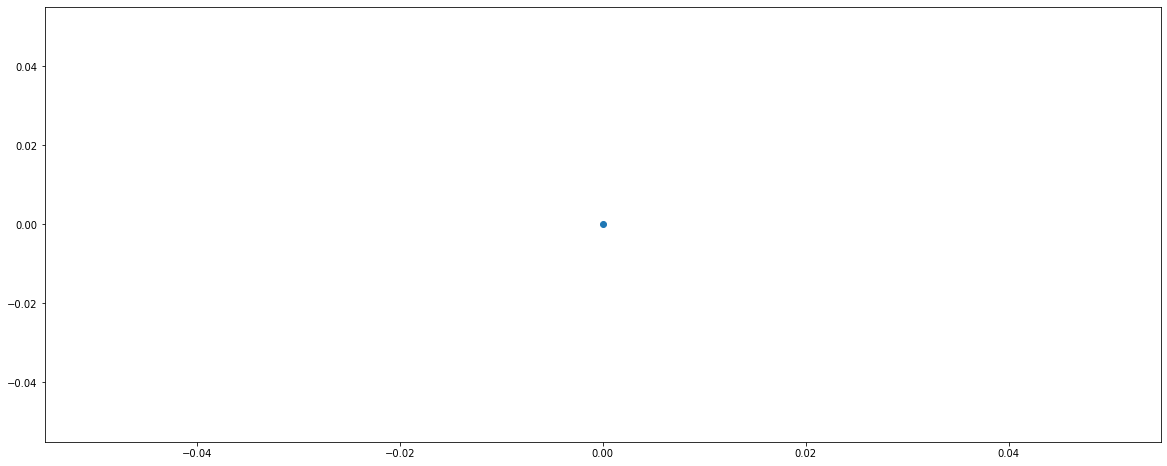

In [ ]:
plt.scatter(cc_r.keys(),cc_r.values())
plt.gcf().set_size_inches(20,8)

In [ ]:
cc_nr = {}
for n,k in nrg.out_degree:
  cc_nr[k] = nx.clustering(nrg,n)

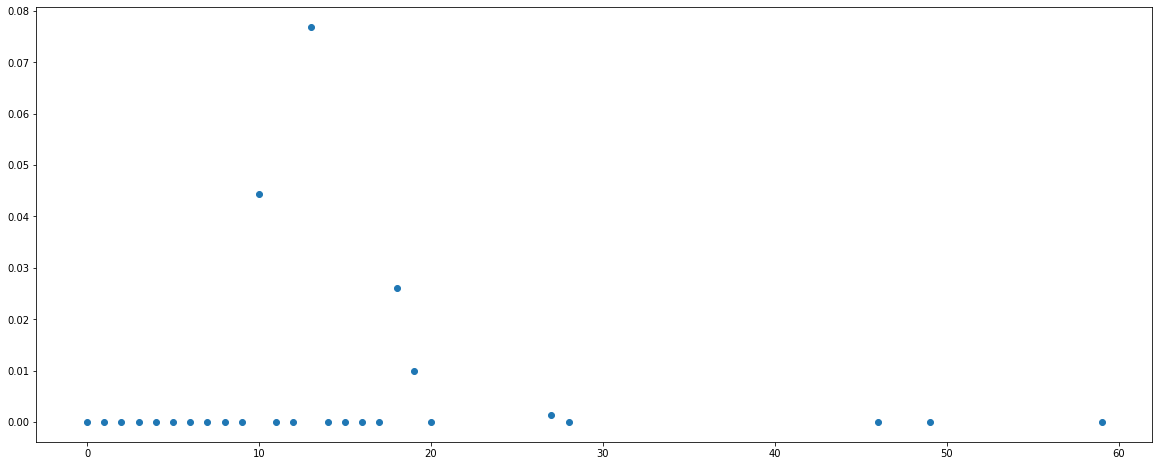

In [ ]:
plt.scatter(cc_nr.keys(),cc_nr.values())
plt.gcf().set_size_inches(20,8)

In [ ]:
from matplotlib_venn import venn2

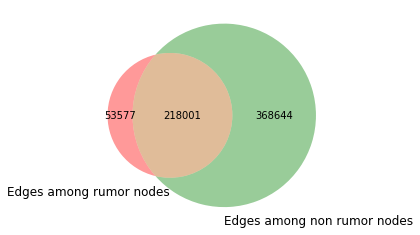

In [ ]:
venn2(subsets = (53577,368644,218001),set_labels = ('Edges among rumor nodes','Edges among non rumor nodes'))

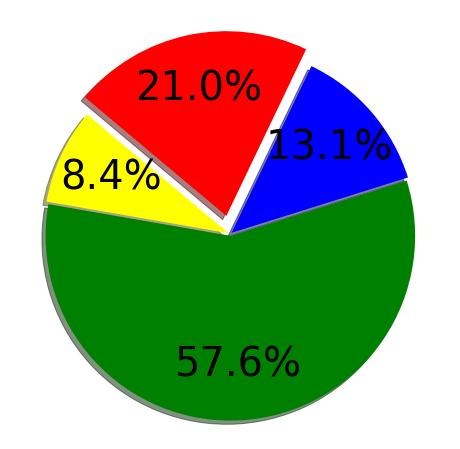

In [ ]:
edges = [53577,368644,83593,134408]
explode = [0.01,0.01,0.01,0.1]
labels = ['Edges Between Rumor Nodes','Edges Between Non Rumor Nodes','Edges going from Non Rumor Nodes to Rumor Nodes','Edges going from Rumor Nodes to Non Rumor Nodes']
colors = ['yellow','green','blue','red']

plt.pie(edges, explode=explode, colors=colors,
autopct='%1.1f%%',textprops = {'fontsize':40},pctdistance = 0.7, shadow=True, startangle=140)

plt.axis('equal')
plt.gcf().set_size_inches(8,8)
plt.show()

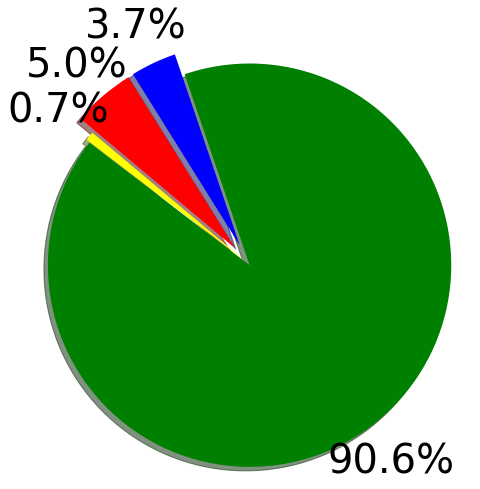

In [ ]:
edges = [
202,
25694,
1040,
1420
]
explode = [0.01,0.01,0.1,0.1]
labels = ['Edges Between Rumor Nodes','Edges Between Non Rumor Nodes','Edges going from Non Rumor Nodes to Rumor Nodes','Edges going from Rumor Nodes to Non Rumor Nodes']
colors = ['yellow','green','blue','red']

plt.pie(edges, explode=explode, colors=colors,
autopct='%1.1f%%',textprops = {'fontsize':40},pctdistance = 1.2 , shadow=True, startangle=140)

plt.axis('equal')
plt.gcf().set_size_inches(8,8)
plt.show()

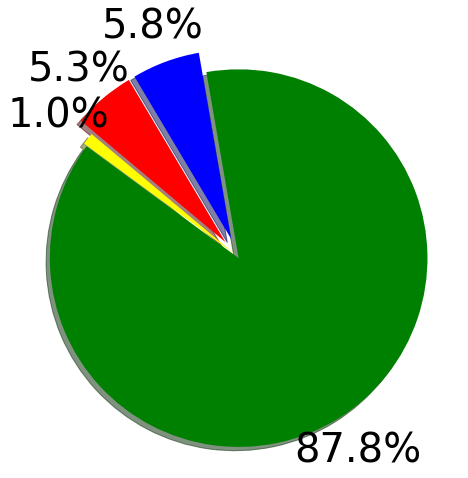

In [ ]:
edges = [
1625,
140720,
9316,
8553
]
explode = [0.01,0.01,0.1,0.1]
labels = ['Edges Between Rumor Nodes','Edges Between Non Rumor Nodes','Edges going from Non Rumor Nodes to Rumor Nodes','Edges going from Rumor Nodes to Non Rumor Nodes']
colors = ['yellow','green','blue','red']

plt.pie(edges, explode=explode, colors=colors,
autopct='%1.1f%%',textprops = {'fontsize':40},pctdistance = 1.2, shadow=True, startangle=140)

plt.axis('equal')
plt.gcf().set_size_inches(8,8)
plt.show()

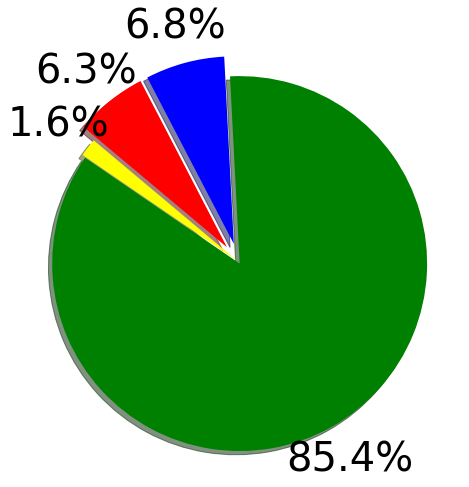

In [ ]:
edges = [
3697,
203204,
16227,
14884
]
explode = [0.01,0.01,0.1,0.1]
labels = ['Edges Between Rumor Nodes','Edges Between Non Rumor Nodes','Edges going from Non Rumor Nodes to Rumor Nodes','Edges going from Rumor Nodes to Non Rumor Nodes']
colors = ['yellow','green','blue','red']

plt.pie(edges, explode=explode, colors=colors,
autopct='%1.1f%%',textprops = {'fontsize':40},pctdistance = 1.2, shadow=True, startangle=140)

plt.axis('equal')
plt.gcf().set_size_inches(8,8)
plt.show()

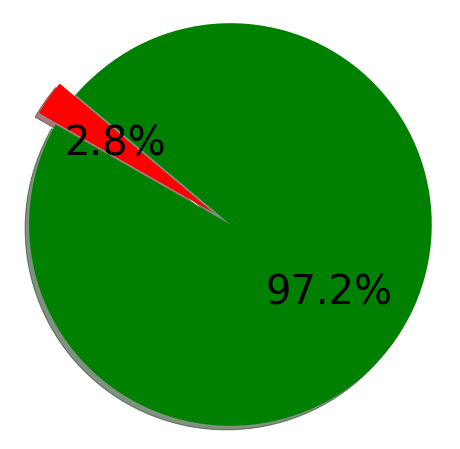

In [ ]:
nodes = [#,#]
labels = ['Users who have tweeted rumors','Users who have never tweeted rumors']
colors = ['red','green']
explode = [0.1,0]

plt.pie(nodes, explode=explode, colors=colors,
autopct='%1.1f%%',textprops = {'fontsize': 40}, shadow=True, startangle=140)

plt.axis('equal')
plt.gcf().set_size_inches(8,8)
plt.show()

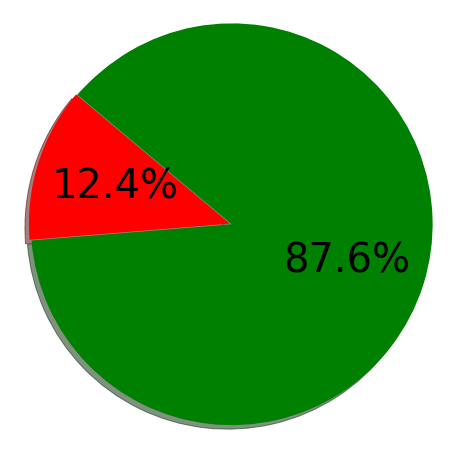

In [ ]:
nodes = [2608,10404+8026]
labels = ['Users who have tweeted rumors','Users who have never tweeted rumors']
colors = ['red','green']
explode = [0.01,0]

plt.pie(nodes, explode=explode, colors=colors,
autopct='%1.1f%%',textprops = {'fontsize': 40}, shadow=True, startangle=140)

plt.axis('equal')
plt.gcf().set_size_inches(8,8)
plt.show()

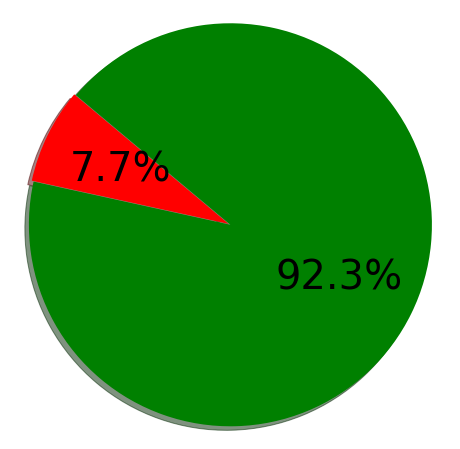

In [ ]:
nodes = [2334,18297+9800]
labels = ['Users who have tweeted rumors','Users who have never tweeted rumors']
colors = ['red','green']
explode = [0.01,0]

plt.pie(nodes, explode=explode, colors=colors,
autopct='%1.1f%%',textprops = {'fontsize': 40}, shadow=True, startangle=140)

plt.axis('equal')
plt.gcf().set_size_inches(8,8)
plt.show()

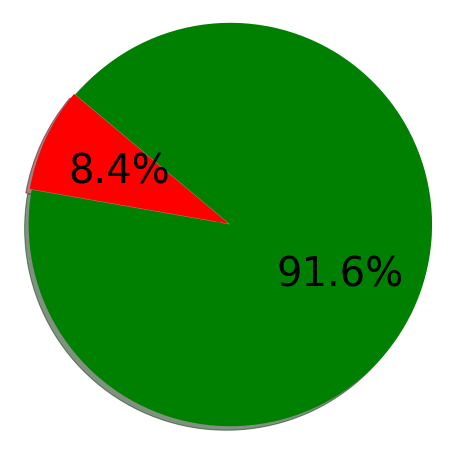

In [ ]:
nodes = [6807,54556+20073]
labels = ['Users who have tweeted rumors','Users who have never tweeted rumors']
colors = ['red','green']
explode = [0.01,0]

plt.pie(nodes, explode=explode, colors=colors,
autopct='%1.1f%%',textprops = {'fontsize': 40}, shadow=True, startangle=140)

plt.axis('equal')
plt.gcf().set_size_inches(8,8)
plt.show()

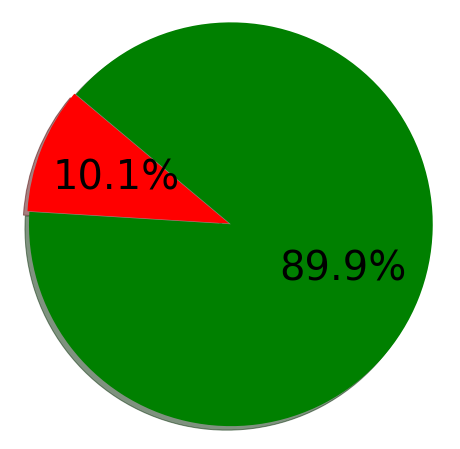

In [ ]:
nodes = [17089,151561]
labels = ['Users who have tweeted rumors','Users who have never tweeted rumors']
colors = ['red','green']
explode = [0.01,0]

plt.pie(nodes, explode=explode, colors=colors,
autopct='%1.1f%%',textprops = {'fontsize': 40}, shadow=True, startangle=140)

plt.axis('equal')
plt.gcf().set_size_inches(8,8)
plt.show()

In [ ]:
df2 = data2

s = df2['mentions'].tolist()
for i in range(len(df2['mentions'])):
    s[i] = s[i].strip("]'[").split("', '")

edgelist = []
nodelist = df2['username'].tolist()
for i in range(len(df2['mentions'])):
    if ((len(s[i])) > 0):
        for j in range(len(s[i])):
            if ((len(s[i][j])) > 1):
                edgelist.append((df2['username'].iloc[i], s[i][j]))

G = nx.DiGraph()
G.add_edges_from(edgelist)

In [ ]:
deg_dist = {}
out_degs = []
for k,v in G.out_degree:
  out_degs.append(v)
for i in range(max(out_degs)):
  count = 0
  for v in out_degs:
    if v == i:
      count += 1
  deg_dist[i] = count

In [ ]:
for i in deg_dist:
  if deg_dist[i] == 0:
    deg_dist[i] = 0.001

In [ ]:
temp = list(deg_dist.keys())

In [ ]:
temp[0] = 0.001

In [ ]:
temp[:10]

[0.01, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
temp2 = list(deg_dist.values())

In [ ]:
t = np.log10(temp)
t2 = np.log10(temp2)

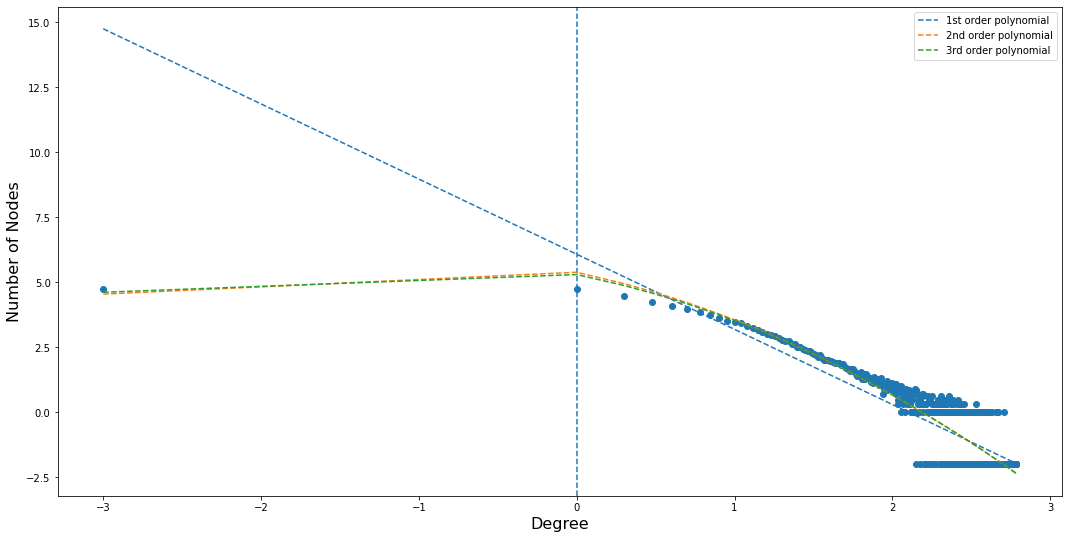

In [ ]:
plt.scatter(t,t2)

plt.axvline(x=0,linestyle = '--')

trend1 = np.polyfit(t,t2,1)
polytrend = np.poly1d(trend1)
plt.plot(t,polytrend(t),'--',label = '1st order polynomial')

trend2 = np.polyfit(t,t2,2)
polytrend = np.poly1d(trend2)
plt.plot(t,polytrend(t),'--',label = '2nd order polynomial')

trend3 = np.polyfit(t,t2,3)
polytrend = np.poly1d(trend3)
plt.plot(t,polytrend(t),'--',label = '3rd order polynomial')

plt.gcf().set_size_inches(18,9)
plt.xlabel('Degree',fontsize = 16)
plt.ylabel('Number of Nodes',fontsize = 16)
plt.legend()

plt.show()

In [ ]:
print(np.polyfit(t,t2,1))
print(np.polyfit(t,t2,2))
print(np.polyfit(t,t2,3))

[-2.89202601  6.07262252]
[-0.52877801 -1.30523283  5.37961496]
[-0.00826265 -0.51634574 -1.24751138  5.28965309]


In [ ]:
polyfitvals1 = []
for x in t:
  polyfitvals1.append(np.polyfit(t,t2,1)[0]*x + np.polyfit(t,t2,1)[1]) 

In [ ]:
correlation1 = np.corrcoef(t2,polyfitvals1)[0,1]
determination1 = correlation1**2
print(determination1)

0.7328148388019996


In [ ]:
polyfitvals2 = []
for x in t:
  polyfitvals2.append(np.polyfit(t,t2,2)[0]*x**2 + np.polyfit(t,t2,2)[1]*x + np.polyfit(t,t2,2)[2]) 

In [ ]:
correlation2 = np.corrcoef(t2,polyfitvals2)[0,1]

In [ ]:
determination2 = correlation2**2
print(determination2)

0.8260656502210572


In [ ]:
polyfitvals3 = []
for x in t:
  polyfitvals3.append(np.polyfit(t,t2,3)[0]*x**3 + np.polyfit(t,t2,3)[1]*x**2 + np.polyfit(t,t2,3)[2]*x + np.polyfit(t,t2,3)[3]) 

In [ ]:
correlation3 = np.corrcoef(t2,polyfitvals3)[0,1]
determination3 = correlation3**2
print(determination3)

0.8261049709616799


In [ ]:
in_deg_dist = {}
in_degs = []
for k,v in G.in_degree:
  in_degs.append(v)
for i in range(max(in_degs)):
  count = 0
  for v in in_degs:
    if v == i:
      count += 1
  in_deg_dist[i] = count

In [ ]:
for i in in_deg_dist:
  if in_deg_dist[i] == 0:
    in_deg_dist[i] = 0.001

In [ ]:
in_temp = list(in_deg_dist.keys())
in_temp[0] = 0.001
in_temp2 = list(in_deg_dist.values())
in_t = np.log10(in_temp)
in_t2 = np.log10(in_temp2)

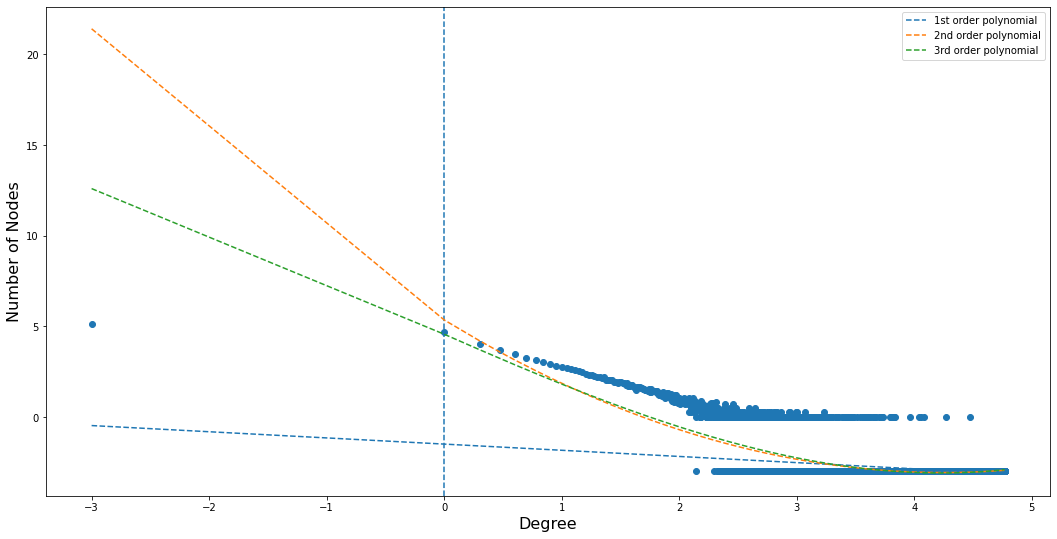

In [ ]:
plt.scatter(in_t,in_t2)

plt.axvline(x = 0,linestyle = '--')

trend1 = np.polyfit(in_t,in_t2,1)
polytrend = np.poly1d(trend1)
plt.plot(in_t,polytrend(in_t),'--',label = '1st order polynomial')

trend2 = np.polyfit(in_t,in_t2,2)
polytrend = np.poly1d(trend2)
plt.plot(in_t,polytrend(in_t),'--',label = '2nd order polynomial')

trend3 = np.polyfit(in_t,in_t2,3)
polytrend = np.poly1d(trend3)
plt.plot(in_t,polytrend(in_t),'--',label = '3rd order polynomial')

plt.gcf().set_size_inches(18,9)
plt.xlabel('Degree',fontsize = 16)
plt.ylabel('Number of Nodes',fontsize = 16)
plt.legend()

plt.show()

In [ ]:
print(np.polyfit(in_t,in_t2,1))
print(np.polyfit(in_t,in_t2,2))
print(np.polyfit(in_t,in_t2,3))

[-0.34073273 -1.4901031 ]
[ 0.46504148 -3.95674605  5.35808831]
[ 0.04274828  0.06739941 -2.85964363  4.56953668]


In [ ]:
in_polyfitvals1 = []
for x in in_t:
  in_polyfitvals1.append(np.polyfit(in_t,in_t2,1)[0]*x + np.polyfit(in_t,in_t2,1)[1]) 
in_correlation1 = np.corrcoef(in_t2,in_polyfitvals1)[0,1]
in_determination1 = in_correlation1**2
print(in_determination1)

0.18661358122957214


In [ ]:
a1 = np.polyfit(in_t,in_t2,2)[0]
a2 = np.polyfit(in_t,in_t2,2)[1]
a3 = np.polyfit(in_t,in_t2,2)[2]

In [ ]:
in_polyfitvals2 = []
for x in in_t:
  in_polyfitvals2.append(a1*x**2 + a2*x + a3)
in_correlation2 = np.corrcoef(in_t2,in_polyfitvals2)[0,1]
in_determination2 = in_correlation2**2
print(in_determination2)

0.5097142780797335


In [ ]:
b1 = np.polyfit(in_t,in_t2,3)[0]
b2 = np.polyfit(in_t,in_t2,3)[1]
b3 = np.polyfit(in_t,in_t2,3)[2]
b4 = np.polyfit(in_t,in_t2,3)[3]

In [ ]:
in_polyfitvals3 = []
for x in in_t:
  in_polyfitvals3.append(b1*x**3 + b2*x**2 + b3*x + b4)
in_correlation3 = np.corrcoef(in_t2,in_polyfitvals3)[0,1]
in_determination3 = in_correlation3**2
print(in_determination3)

0.5270298699343036


In [ ]:
pr = nx.pagerank(G)

In [ ]:
pr_values = []
for k in pr:
  pr_values.append(pr[k])

In [ ]:
max(pr_values)

0.08344845617485004

In [ ]:
for k in pr:
  if pr[k] == 0.08344845617485004:
    print(k)

narendramodi


In [ ]:
for nodes in G.successors('narendramodi'):
  print(nodes)

tv9bharatvarsh
feverfmofficial
yogrishiramdev
rajatsharmalive
prabhuchawla


In [ ]:
degs = []
for k,v in G.in_degree:
  degs.append(v)

(-0.01, 0.02)

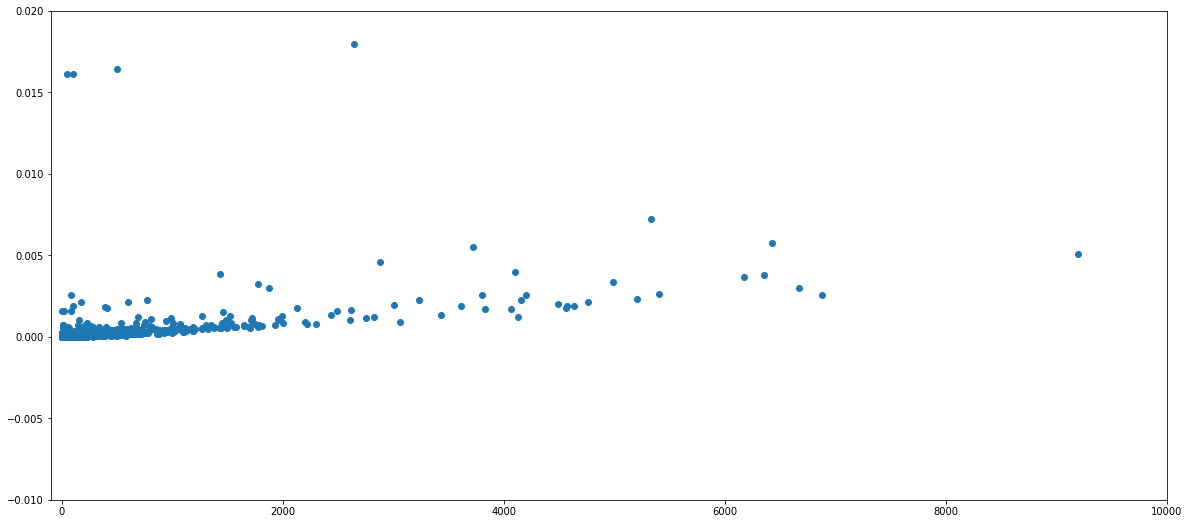

In [ ]:
plt.scatter(degs,pr_values)
plt.gcf().set_size_inches(20,9)
plt.xlim(-100,10000)
plt.ylim(-0.01,0.02)

In [ ]:
nx.is_connected(G.to_undirected())

False

In [ ]:
conn_nodes = []
for nodes in G.nodes:
  if G.degree(nodes) > 0:
    conn_nodes.append(nodes)

In [ ]:
g = G.subgraph(conn_nodes).copy()

In [ ]:
nx.is_connected(g.to_undirected())

False

In [ ]:
g_undirected = g.to_undirected()

In [ ]:
com_dist = []
components = sorted(nx.connected_components(g_undirected),key=len,reverse=True)
for com in components:
  com_dist.append(len(com))

In [ ]:
com_dist[:20]

[213639, 17, 13, 9, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6]

In [ ]:
num_of_com = {}
for i in com_dist:
  num_of_com[i] = com_dist.count(i)*i

In [ ]:
num_of_com.keys()

dict_keys([213639, 17, 13, 9, 8, 7, 6, 5, 4, 3, 2, 1])

(-100.0, 1000.0)

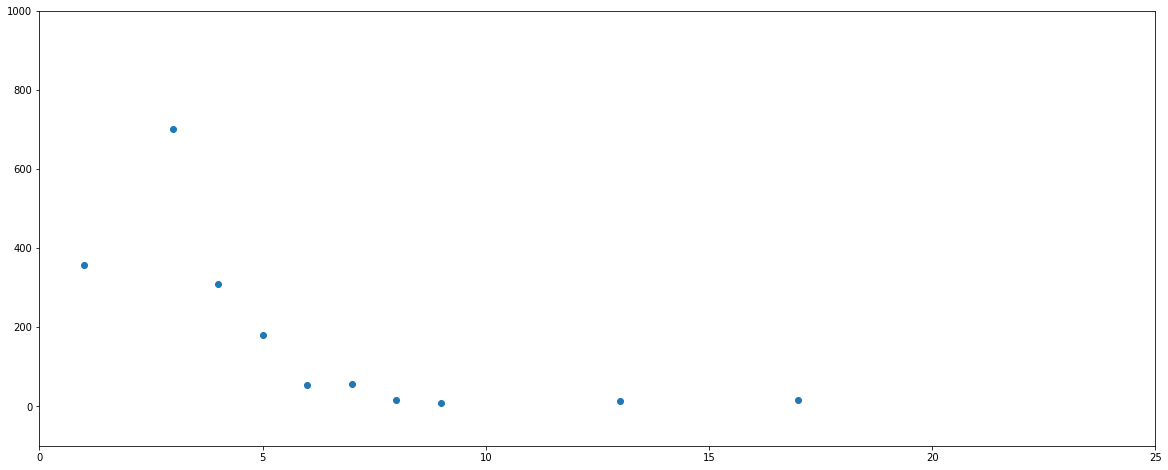

In [ ]:
plt.scatter(list(num_of_com.keys()),list(num_of_com.values()))
plt.gcf().set_size_inches(20,8)
plt.xlim(0,25)
plt.ylim(-100,1000)

In [ ]:
rumor_edge_list = []
for edges in G1.edges:
  if edges[0] in rumour_nodes and edges[1] not in rumour_nodes:
    rumor_edge_list.append(edges)

In [ ]:
len(rumor_edge_list)

14416

In [ ]:
h,k = nx.hits(G)

In [ ]:
hub_vals = []
for keys in h:
  hub_vals.append(h[keys])

In [ ]:
for keys in h:
  if h[keys] == 6.167206537450911e-05:
    print(keys)

anjanaagrawal6


In [ ]:
hub_vals = []
auth_vals = []
degs = []
for n in G.nodes:
  hub_vals.append(h[n])
  auth_vals.append(k[n])
  degs.append(G.degree(n))

(-100.0, 10000.0)

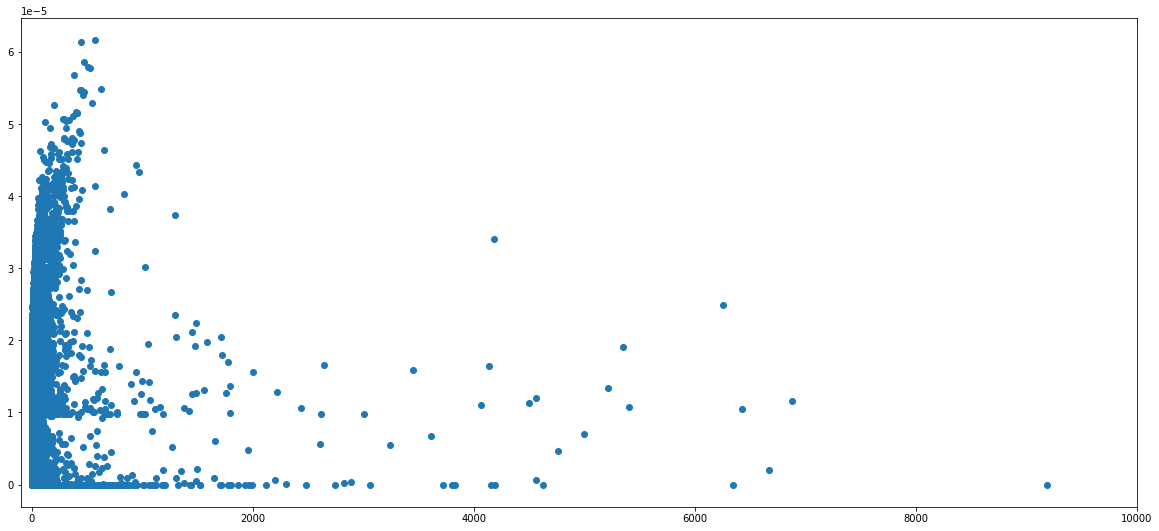

In [ ]:
plt.scatter(degs,hub_vals)
plt.gcf().set_size_inches(20,9)
plt.xlim(-100,10000)

(-0.001, 0.01)

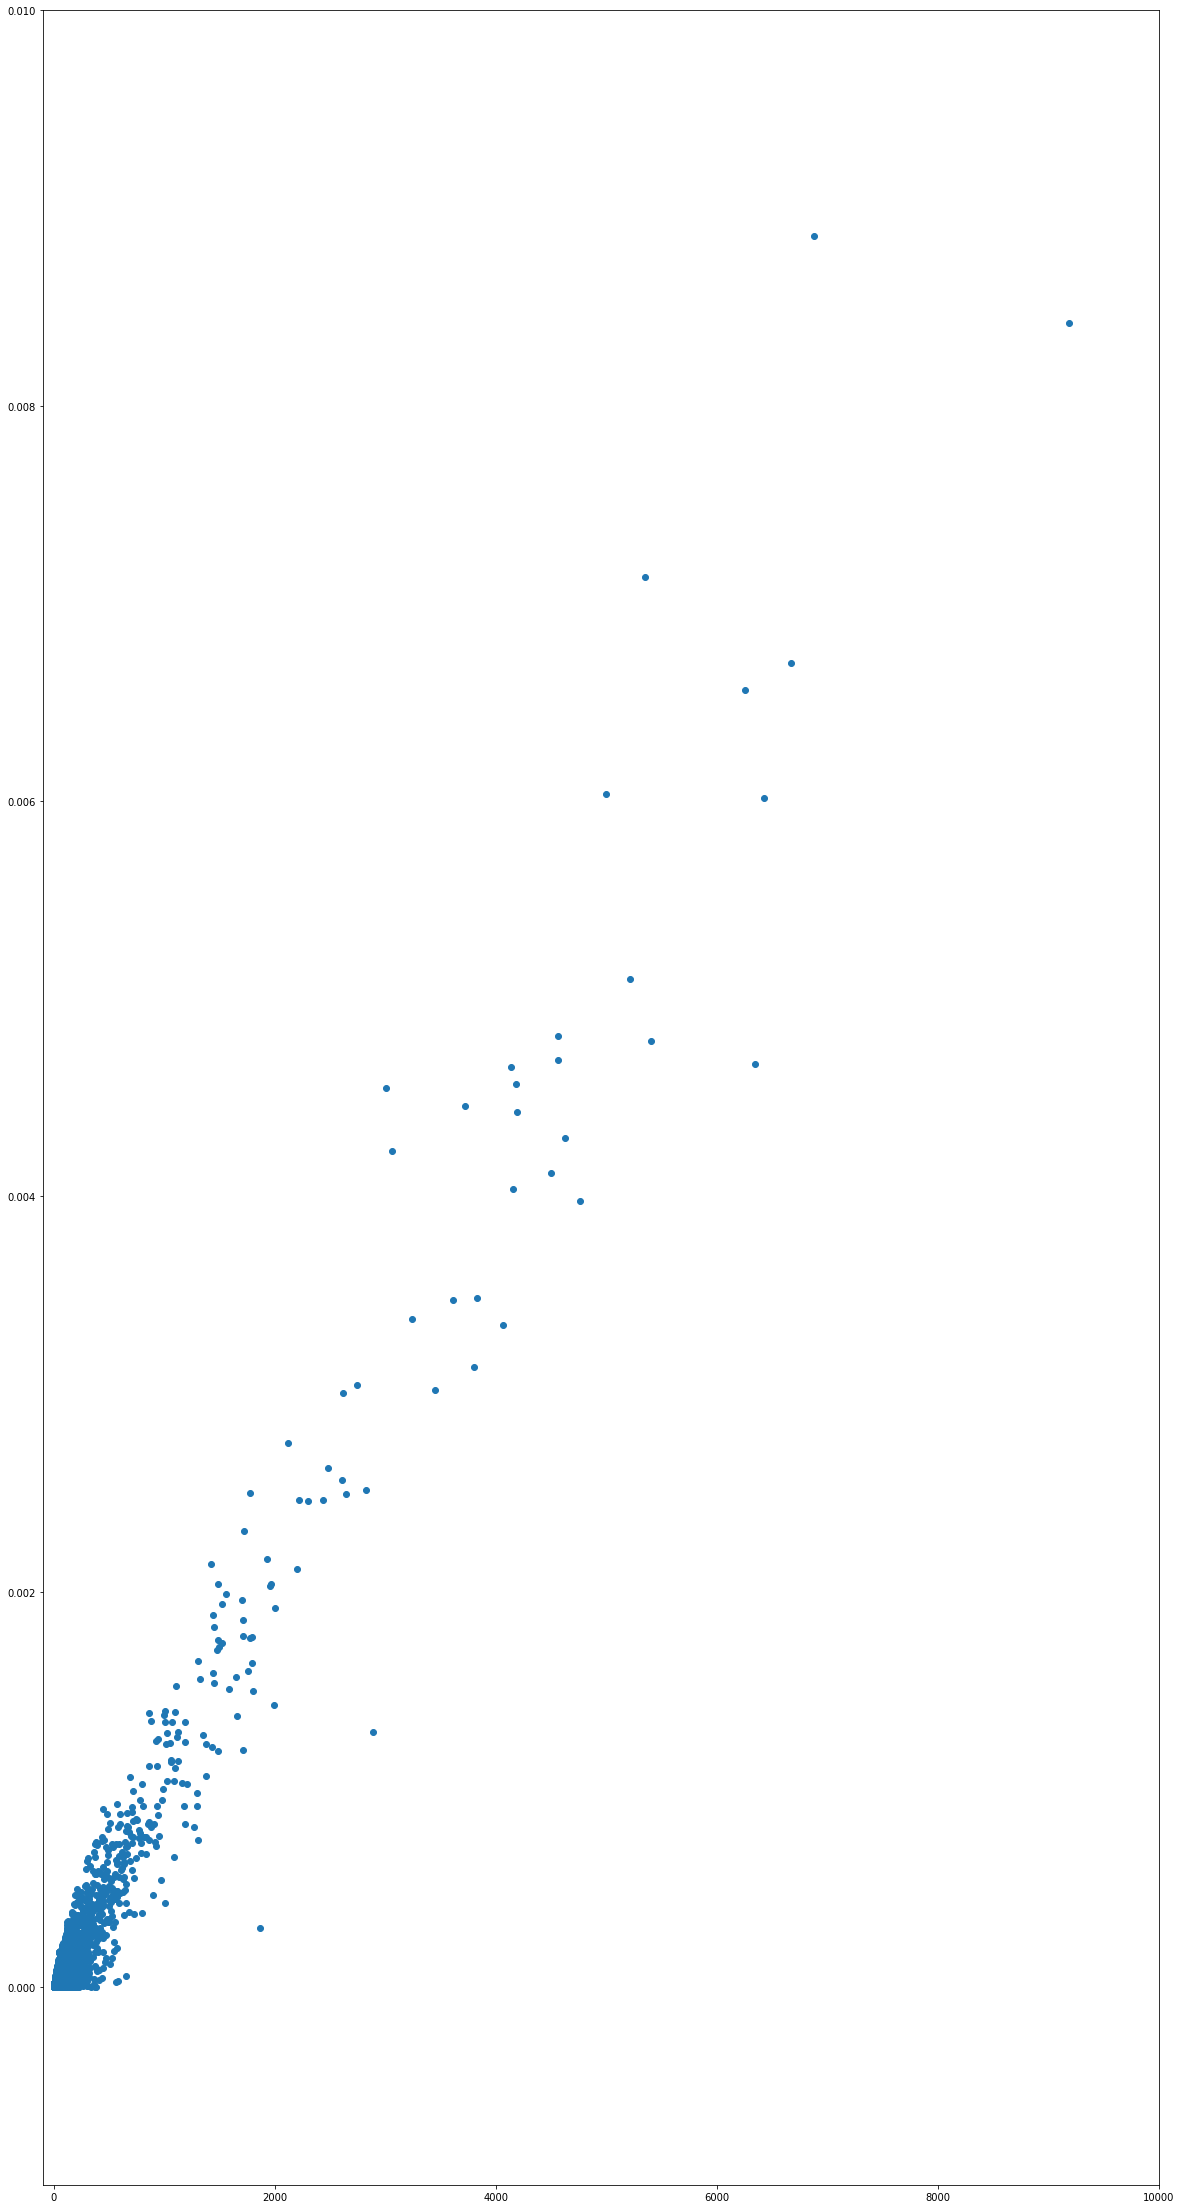

In [ ]:
plt.scatter(degs,auth_vals)
plt.gcf().set_size_inches(20,40)
plt.xlim(-100,10000)
plt.ylim(-0.001,0.01)

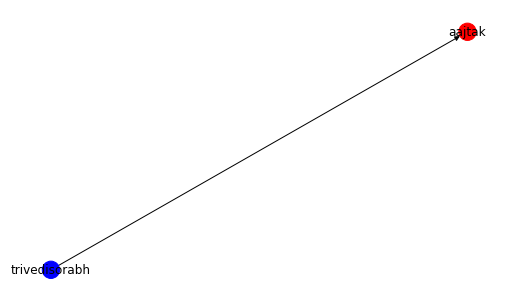

In [ ]:
exg = nx.DiGraph()
exg.add_node("trivedisorabh")
exg.add_node("aajtak")
exg.add_edge("trivedisorabh","aajtak")
nx.draw(exg,node_color=['blue','red'],edge_color='black',with_labels=True)
plt.gcf().set_size_inches(7,4)